### Import Libraries

In [6]:
# Data
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection & Preprocessing
import os
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Machine Learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score


### Import Data

In [7]:
incv = pd.read_excel("../dataset/incovid.xlsx")

chosen_variables = ['Z','FD', 'RE/TA', 'NI/TA\n', 'CF', 'CA/TO', 'CL/TA\n', 'TD/TA', 'P/E', 'P/B', 'SIZE\n', 'AUR', 'AUP', 'AUD', 'AEM', 'INF', 'GDP', 'LIR']
incv = incv[chosen_variables]

In [8]:
incv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Z       558 non-null    float64
 1   FD      558 non-null    int64  
 2   RE/TA   558 non-null    float64
 3   NI/TA
  558 non-null    float64
 4   CF      558 non-null    float64
 5   CA/TO   558 non-null    float64
 6   CL/TA
  558 non-null    float64
 7   TD/TA   558 non-null    float64
 8   P/E     558 non-null    float64
 9   P/B     558 non-null    float64
 10  SIZE
   558 non-null    float64
 11  AUR     558 non-null    int64  
 12  AUP     558 non-null    int64  
 13  AUD     558 non-null    int64  
 14  AEM     558 non-null    float64
 15  INF     558 non-null    float64
 16  GDP     558 non-null    float64
 17  LIR     558 non-null    float64
dtypes: float64(14), int64(4)
memory usage: 78.6 KB


### Find missing values

In [9]:
# Number of missing values
column_names = incv.columns
for column in column_names:
    print(column + ' - ' + str(incv[column].isnull().sum()))
        
# Remove rows with NaN values
incv = incv.dropna()

# Number of missing values after removing NaN values
column_names = incv.columns
for column in column_names:
    print(column + ' - ' + str(incv[column].isnull().sum()))


Z - 0
FD - 0
RE/TA - 0
NI/TA
 - 0
CF - 0
CA/TO - 0
CL/TA
 - 0
TD/TA - 0
P/E - 0
P/B - 0
SIZE
 - 0
AUR - 0
AUP - 0
AUD - 0
AEM - 0
INF - 0
GDP - 0
LIR - 0
Z - 0
FD - 0
RE/TA - 0
NI/TA
 - 0
CF - 0
CA/TO - 0
CL/TA
 - 0
TD/TA - 0
P/E - 0
P/B - 0
SIZE
 - 0
AUR - 0
AUP - 0
AUD - 0
AEM - 0
INF - 0
GDP - 0
LIR - 0


### Z-score to handle Outliers

In [10]:
# Assume 'incv' is your DataFrame and 'FD' is the target variable
# Calculate Z-scores for each numeric column in the DataFrame
z_scores = np.abs((incv - incv.mean()) / incv.std())

# Define a threshold for outlier detection (e.g., 3 standard deviations from the mean)
threshold = 3

# Create a boolean mask for each row indicating whether it's an outlier or not
outlier_mask = (z_scores > threshold).any(axis=1)

# Filter out the outliers from the DataFrame
# processed_

incv = incv[~outlier_mask]


### Assign x & y

In [11]:
features = ['RE/TA', 'NI/TA\n', 'CF', 'CA/TO', 'CL/TA\n', 'TD/TA', 'P/E', 'P/B', 'SIZE\n', 'AUR', 'AUP', 'AUD', 'AEM', 'INF', 'GDP', 'LIR']
x = incv[features]
x.describe()

,RE/TA,NI/TA\n,CF,CA/TO,CL/TA\n,TD/TA,P/E,P/B,SIZE\n,AUR,AUP,AUD,AEM,INF,GDP,LIR
count,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.0,524.000000,524.000000,524.000000,524.000000
mean,-0.299921,0.012263,2.656674,1.224140,0.751148,31.878334,22.455758,1.102666,2.633296,0.129771,0.660305,1.0,-0.013798,2.747328,374.611450,7.797710
std,1.489197,0.186757,29.385134,0.968020,1.178761,38.642226,89.569973,1.749601,0.654156,0.336372,0.474058,0.0,0.201965,0.635699,25.957828,0.164062
min,-14.309524,-1.857143,-172.430000,0.007692,0.021014,0.000000,-313.980000,-9.970000,0.698970,0.000000,0.000000,1.0,-1.432836,1.840000,346.000000,7.600000
25%,-0.157477,-0.034026,-5.210000,0.590565,0.287200,13.075000,-1.105000,0.450000,2.190332,0.000000,0.000000,1.0,-0.099048,1.840000,346.000000,7.600000
50%,0.023963,0.016173,2.840000,1.043566,0.475392,26.010000,7.045000,0.920000,2.597694,0.000000,1.000000,1.0,-0.030664,3.150000,370.000000,7.800000
75%,0.083439,0.058747,11.675000,1.530129,0.701134,40.647500,16.685000,1.440000,3.026821,0.000000,1.000000,1.0,0.053469,3.230000,408.800000,8.000000
max,2.187135,1.564417,183.220000,5.615385,11.666667,455.120000,1091.650000,18.630000,4.689770,1.000000,1.000000,1.0,1.321637,3.230000,408.800000,8.000000


In [12]:
y = incv.FD
y.describe()

count    524.000000
mean       0.490458
std        0.500387
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: FD, dtype: float64

### Data Splitting

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2, shuffle=False
)

### Descriptive Statistics

In [29]:
incv.describe()

,Z,FD,RE/TA,NI/TA\n,CF,CA/TO,CL/TA\n,TD/TA,P/E,P/B,SIZE\n,AUR,AUP,AUD,AEM,INF,GDP,LIR
count,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.0,524.000000,524.000000,524.000000,524.000000
mean,0.621183,0.490458,-0.299921,0.012263,2.656674,1.224140,0.751148,31.878334,22.455758,1.102666,2.633296,0.129771,0.660305,1.0,-0.013798,2.747328,374.611450,7.797710
std,0.421812,0.500387,1.489197,0.186757,29.385134,0.968020,1.178761,38.642226,89.569973,1.749601,0.654156,0.336372,0.474058,0.0,0.201965,0.635699,25.957828,0.164062
min,0.000000,0.000000,-14.309524,-1.857143,-172.430000,0.007692,0.021014,0.000000,-313.980000,-9.970000,0.698970,0.000000,0.000000,1.0,-1.432836,1.840000,346.000000,7.600000
25%,0.000000,0.000000,-0.157477,-0.034026,-5.210000,0.590565,0.287200,13.075000,-1.105000,0.450000,2.190332,0.000000,0.000000,1.0,-0.099048,1.840000,346.000000,7.600000
50%,1.000000,0.000000,0.023963,0.016173,2.840000,1.043566,0.475392,26.010000,7.045000,0.920000,2.597694,0.000000,1.000000,1.0,-0.030664,3.150000,370.000000,7.800000
75%,1.000000,1.000000,0.083439,0.058747,11.675000,1.530129,0.701134,40.647500,16.685000,1.440000,3.026821,0.000000,1.000000,1.0,0.053469,3.230000,408.800000,8.000000
max,1.000000,1.000000,2.187135,1.564417,183.220000,5.615385,11.666667,455.120000,1091.650000,18.630000,4.689770,1.000000,1.000000,1.0,1.321637,3.230000,408.800000,8.000000


### Correlation Matrix

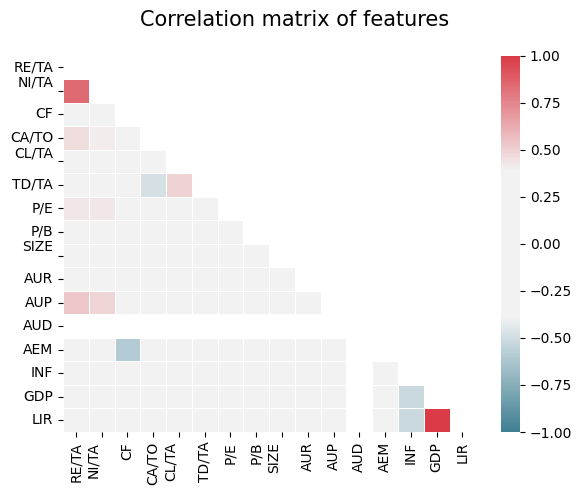

In [16]:
import matplotlib.pyplot as plt

corr = x.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)
fig.tight_layout()

# Get the current directory
current_dir = os.getcwd()

# Save the plot as PNG in the current directory
plt.savefig(os.path.join(current_dir, 'correlation_matrix.png'))

### Scale Data

In [17]:
from sklearn.preprocessing import StandardScaler
# Scale the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Compare ML Methods

In [12]:
# Machine Learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [13]:
# Initialize the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Support Vector Machine', SVC()),
    ('Neural Network', MLPClassifier(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBoost', XGBClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
]

# Initialize empty lists to store the evaluation results
results = []
conf_matrices = []
precisions = []
recalls = []
auc_scores = []
accuracies = []
roc_curves = []

# Iterate over each model
for name, model in models:
    # Fit the model on the scaled training data
    model.fit(x_train_scaled, y_train)

    # Make predictions on the scaled test data
    if isinstance(model, (LinearRegression, MLPClassifier)):
        # For regression models, convert predictions to binary using a threshold of 0.5
        y_pred = np.where(model.predict(x_test_scaled) >= 0.5, 1, 0)
    else:
        # For classification models, use direct predictions
        y_pred = model.predict(x_test_scaled)
        y_pred = np.where(y_pred >= 0.5, 1, 0)  # Ensure binary values

    # Calculate evaluation metrics
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # Append the results to the respective lists
    conf_matrices.append(cm)
    precisions.append(precision)
    recalls.append(recall)
    auc_scores.append(auc)
    accuracies.append(accuracy)
    roc_curves.append((fpr, tpr))

    # Append the results as a dictionary
    results.append({
        'Model': name,
        'Confusion Matrix': cm,
        'Recall': recall,
        'Precision': precision,
        'AUC': auc,
        'Accuracy': accuracy
    })


### Altman Z-score Evaluation

In [14]:
# Filter out rows where 'Z' column equals 0.5
filtered_incv = incv[incv['Z'] != 0.5]

# Assign 'FD' column to y_test
y_ztest = filtered_incv['FD']

# Assign 'Z' column to y_pred
y_zpred = filtered_incv['Z']

# Calculate evaluation metrics
cm = confusion_matrix(y_ztest, y_zpred)
precision = precision_score(y_ztest, y_zpred)
recall = recall_score(y_ztest, y_zpred)
auc = roc_auc_score(y_ztest, y_zpred)
accuracy = accuracy_score(y_ztest, y_zpred)
fpr, tpr, _ = roc_curve(y_ztest, y_zpred)

# Append the results to the respective lists
conf_matrices.append(cm)
precisions.append(precision)
recalls.append(recall)
auc_scores.append(auc)
accuracies.append(accuracy)
roc_curves.append((fpr, tpr))

# Append the results as a dictionary
results.append({
    'Model': 'Altman Z-score',
    'Confusion Matrix': cm,
    'Recall': recall,
    'Precision': precision,
    'AUC': auc,
    'Accuracy': accuracy
})

### Compare all models

In [15]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df

,Model,Confusion Matrix,Recall,Precision,AUC,Accuracy
0,Linear Regression,"[[6, 1], [22, 76]]",0.775510,0.987013,0.816327,0.780952
1,Logistic Regression,"[[7, 0], [8, 90]]",0.918367,1.000000,0.959184,0.923810
2,K-Nearest Neighbors,"[[5, 2], [20, 78]]",0.795918,0.975000,0.755102,0.790476
3,Naive Bayes,"[[6, 1], [15, 83]]",0.846939,0.988095,0.852041,0.847619
4,Support Vector Machine,"[[6, 1], [12, 86]]",0.877551,0.988506,0.867347,0.876190
5,Neural Network,"[[7, 0], [2, 96]]",0.979592,1.000000,0.989796,0.980952
6,Decision Tree,"[[6, 1], [2, 96]]",0.979592,0.989691,0.918367,0.971429
7,Gradient Boosting,"[[5, 2], [0, 98]]",1.000000,0.980000,0.857143,0.980952
8,Random Forest,"[[5, 2], [0, 98]]",1.000000,0.980000,0.857143,0.980952
9,XGBoost,"[[6, 1], [0, 98]]",1.000000,0.989899,0.928571,0.990476


### Feature Importance for Decision Tree & Ensemble Methods

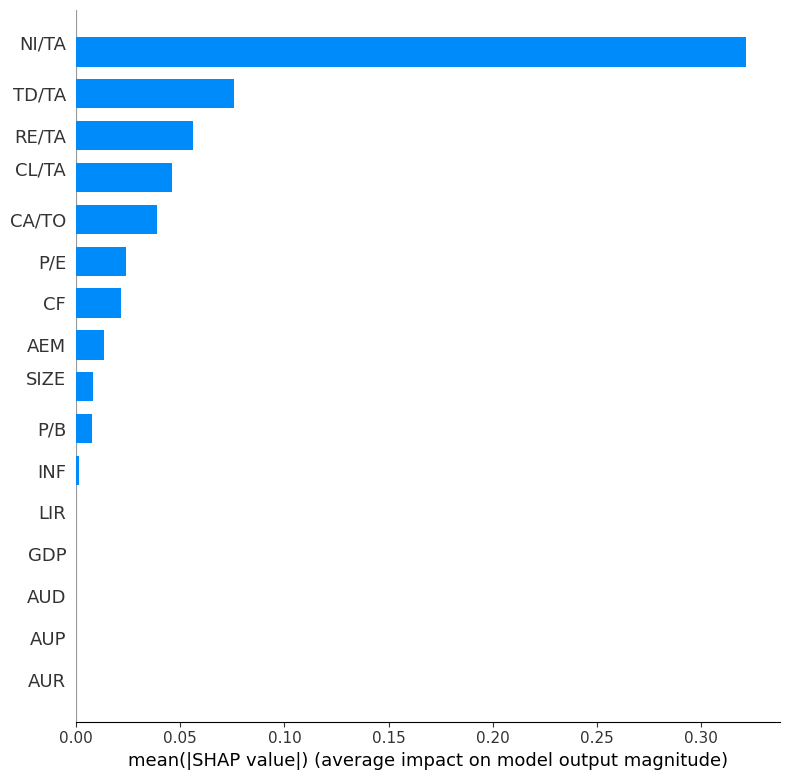

In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import shap

# Define the parameters for the Decision Tree model
tree_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

# Train a Decision Tree model with the specified parameters
tree_model = DecisionTreeRegressor(**tree_params)
tree_model.fit(x_train_scaled, y_train)

# Convert x_train_scaled to a pandas DataFrame
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)

# Create a SHAP TreeExplainer for the Decision Tree model
tree_explainer = shap.TreeExplainer(tree_model)

# Calculate the SHAP values for the Decision Tree model
tree_shap_values = tree_explainer.shap_values(x_train_scaled_df)

# Plot feature importance for Decision Tree
tree_feature_names = x_train_scaled_df.columns
shap.summary_plot(tree_shap_values, x_train_scaled_df, plot_type='bar', feature_names=tree_feature_names, show=False)

# Retrieve the importance values and feature names
tree_importance_values = np.abs(tree_shap_values).mean(axis=0)
non_zero_indices = tree_importance_values > 0
tree_feature_names = x_train_scaled_df.columns[non_zero_indices]
tree_importance_values = tree_importance_values[non_zero_indices]

# Plot feature importance with SHAP values on the right
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size
ax.barh(np.arange(len(tree_feature_names)), tree_importance_values)
ax.set_yticks(np.arange(len(tree_feature_names)))
ax.set_yticklabels(tree_feature_names)
ax.invert_yaxis()
ax.set_xlabel('mean(|SHAP value|)')

# Add SHAP values on the right
for i, v in enumerate(tree_importance_values):
    ax.text(v + 0.01, i, f'{v:.4f}')

# Set larger margins
plt.margins(0.1)

# Get the current directory
current_dir = os.getcwd()

# Save the plot as JPEG in the current directory
plt.title("SHAP on Decision Tree Model")
plt.savefig(os.path.join(current_dir, 'decision_tree_shap.jpg'), bbox_inches='tight')
plt.close()

# Define the parameters for the XGBoost model
xgb_params = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100
}

# Train an XGBoost model with the specified parameters
xgb_model = XGBRegressor(**xgb_params)
xgb_model.fit(x_train_scaled, y_train)

# Create a SHAP TreeExplainer for the XGBoost model
xgb_explainer = shap.TreeExplainer(xgb_model)

# Calculate the SHAP values for the XGBoost model
xgb_shap_values = xgb_explainer.shap_values(x_train_scaled_df)

# Plot feature importance for XGBoost
xgb_feature_names = x_train_scaled_df.columns
shap.summary_plot(xgb_shap_values, x_train_scaled_df, plot_type='bar', feature_names=xgb_feature_names, show=False)

# Retrieve the importance values and feature names
xgb_importance_values = np.abs(xgb_shap_values).mean(axis=0)
non_zero_indices = xgb_importance_values > 0
xgb_feature_names = x_train_scaled_df.columns[non_zero_indices]
xgb_importance_values = xgb_importance_values[non_zero_indices]

# Plot feature importance with SHAP values on the right
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size
ax.barh(np.arange(len(xgb_feature_names)), xgb_importance_values)
ax.set_yticks(np.arange(len(xgb_feature_names)))
ax.set_yticklabels(xgb_feature_names)
ax.invert_yaxis()
ax.set_xlabel('mean(|SHAP value|)')

# Add SHAP values on the right
for i, v in enumerate(xgb_importance_values):
    ax.text(v + 0.01, i, f'{v:.4f}')

# Set larger margins
plt.margins(0.1)

# Save the plot as JPEG in the current directory
plt.title("SHAP on XGBoost Model")
plt.savefig(os.path.join(current_dir, 'xgboost_shap.jpg'), bbox_inches='tight')
plt.close()


### Hyperparameter Tuning for Decision Tree & Ensemble Methods

In [18]:
from sklearn.model_selection import GridSearchCV

In [24]:
# Decision Tree hyperparameter tuning
decision_tree = DecisionTreeClassifier()
decision_tree_params = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
decision_tree_grid = GridSearchCV(decision_tree, decision_tree_params, scoring='recall',cv=5)
decision_tree_grid.fit(x_train_scaled, y_train)

decision_tree_results = pd.DataFrame(decision_tree_grid.cv_results_)
decision_tree_best_params = decision_tree_grid.best_params_
decision_tree_best_score = decision_tree_grid.best_score_

decision_tree_best_params


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [25]:
# Gradient Boosting hyperparameter tuning
gradient_boosting = GradientBoostingClassifier()
gradient_boosting_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}
gradient_boosting_grid = GridSearchCV(gradient_boosting, gradient_boosting_params, scoring='recall',cv=5)
gradient_boosting_grid.fit(x_train_scaled, y_train)

gradient_boosting_results = pd.DataFrame(gradient_boosting_grid.cv_results_)
gradient_boosting_best_params = gradient_boosting_grid.best_params_
gradient_boosting_best_score = gradient_boosting_grid.best_score_

gradient_boosting_best_params

KeyboardInterrupt: 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['lbfgs','liblinear', 'saga']
}

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=1500)

# Create a GridSearchCV object with the logistic regression classifier and the parameter grid
grid_search = GridSearchCV(logistic_regression, param_grid, scoring='recall', cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)


c:\Users\Surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Surface\AppData\Loc

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8310483870967742


### Running the models again with hyperparametertuning

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, accuracy_score, roc_curve
import numpy as np
from sklearn.linear_model import LogisticRegression


# Define the hyperparameters for logistic regression
tree_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
gradient_params = {'loss': 'log_loss', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
logistic_params = {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

# Initialize the models
models = [
    ('Decision Tree', DecisionTreeClassifier(**tree_params)),
    ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)),
    ('Logistic Regression', LogisticRegression(**logistic_params))
]

# Initialize empty lists to store the evaluation results
results = []
conf_matrices = []
precisions = []
recalls = []
auc_scores = []
accuracies = []
roc_curves = []

# Iterate over each model
for name, model in models:
    # Fit the model on the scaled training data
    model.fit(x_train_scaled, y_train)

    # Make predictions on the scaled test data
    if isinstance(model, DecisionTreeClassifier):
        # For Decision Tree, no need to convert predictions to binary
        y_pred = model.predict(x_test_scaled)
    else:
        # For Gradient Boosting and Logistic Regression, use direct predictions and convert to binary using a threshold of 0.5
        y_pred = model.predict_proba(x_test_scaled)[:, 1]
        y_pred = np.where(y_pred >= 0.5, 1, 0)

    # Calculate evaluation metrics
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # Append the results to the respective lists
    conf_matrices.append(cm)
    precisions.append(precision)
    recalls.append(recall)
    auc_scores.append(auc)
    accuracies.append(accuracy)
    roc_curves.append((fpr, tpr))

    # Append the results as a dictionary
    results.append({
        'Model': name,
        'Confusion Matrix': cm,
        'Recall': recall,
        'Precision': precision,
        'AUC': auc,
        'Accuracy': accuracy
    })


In [27]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)

                 Model   Confusion Matrix    Recall  Precision       AUC  \
0        Decision Tree  [[6, 1], [5, 93]]  0.948980   0.989362  0.903061   
1    Gradient Boosting  [[5, 2], [0, 98]]  1.000000   0.980000  0.857143   
2  Logistic Regression  [[7, 0], [6, 92]]  0.938776   1.000000  0.969388   

   Accuracy  
0  0.942857  
1  0.980952  
2  0.942857  
